# Preprocessing

In [79]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
%autoreload 2

In [81]:
import torch

In [82]:
from src.vfm.connection import Connection
from src.vfm.preprocessor import Preprocessor
from src.vfm.resampler import Resampler
from src.utils.descriptive_utils import *
from src.vfm.model.physics.physics_informed import PhysicsInformedHybridModel
from src.utils import *
import json

In [83]:
connection = Connection()
# Get client
client = connection.get_client()

In [84]:
df_all_wells = connection.get_data(client, wells=get_all_wells())
df_all_wells.columns

Index(['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test',
       'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm',
       'well_id'],
      dtype='object')

In [85]:
dependent_vars=get_depdendent_vars()
independent_vars=get_independent_vars()

In [86]:
preprocessor = Preprocessor()
df_all_wells_preprocessed = preprocessor.preprocess_wells(df=df_all_wells)
len(df_all_wells_preprocessed)

Preprocessing well W06 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id']
Preprocessing well W08 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id']
Preprocessing well W10 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id']
Preprocessing well W11 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id']
Preprocessing well W15 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'wc_mpfm', 'well_id']
Preprocessing well W18 with columns ['whp', 'wht', 'dhp', 'dht', 'choke', 'dcp', 'qo_well_test', 'qg_well_test', 'qw_well_test', 'qo_mp

755

In [87]:
summarize_null(df_all_wells_preprocessed)

qo_well_test      0
qg_well_test      0
qw_well_test      0
well_code         0
dhp               0
dht               0
whp               0
wht               0
choke             0
dcp               0
qo_mpfm          30
qg_mpfm          30
qw_mpfm          30
wc_mpfm           0
gor_mpfm         35
wgr_mpfm         36
gor_well_test     0
wgr_well_test     0
well_id           0
time_idx          0
dtype: int64

In [109]:
df_train, df_val, df_test = get_blocked_temporal_train_val_test_split(df=df_all_wells_preprocessed)
print(f"Train={len(df_train)}, Validation={len(df_val)}, Test={len(df_test)}")

Train=559, Validation=60, Test=136


In [110]:
well_geometry: dict = None

with open(r"data\well_geometry.json", "r") as f:
    well_geometry = json.load(f)



In [111]:
model = PhysicsInformedHybridModel(dependant_vars=dependent_vars, independent_vars=independent_vars, well_geometry=well_geometry,
)
model.fit(df=df_train, df_val=df_val)

[Validation] Residual RMSE = 0.4518


In [112]:
model.score_physics(df_test)

{'W06': {'qo': {'r2': 0.5667721325829786,
   'mae': 18.825038262232887,
   'rmse': 22.09642953273951,
   'mape (%)': 22.079732181219487,
   'mpe (%)': 7.5454921101748145},
  'qw': {'r2': 0.00850480571637835,
   'mae': 1.0610510870388152,
   'rmse': 1.38481569983636,
   'mape (%)': 1344.8127481292152,
   'mpe (%)': 1311.0481168231488},
  'qg': {'r2': 0.7270453856409742,
   'mae': 1911.430656121775,
   'rmse': 2193.035796932111,
   'mape (%)': 14.404891182912888,
   'mpe (%)': -13.961915498455706},
  'wgr': {'r2': -2.2726402968169435,
   'mae': 9.000551473494319e-05,
   'rmse': 0.0001434425391786491,
   'mape (%)': 345.53324361293136,
   'mpe (%)': 318.60991562066965},
  'gor': {'r2': -563.018745674769,
   'mae': 16.71888637086949,
   'rmse': 31.253998330492433,
   'mape (%)': 13.659272555158559,
   'mpe (%)': -13.209494096017831}},
 'W08': {'qo': {'r2': -0.1606595701485296,
   'mae': 7.228769657049253,
   'rmse': 8.673340205348985,
   'mape (%)': 47.83992455308022,
   'mpe (%)': 42.0178

In [113]:
model.score_hybrid(df_test)

{'W06': {'qo': {'r2': 0.761470706318163,
   'mae': 14.109440021764849,
   'rmse': 16.39588155262807,
   'mape (%)': 12.006716803316309,
   'mpe (%)': -7.290034602885326},
  'qw': {'r2': -1.2977801030778204,
   'mae': 1.584335770030703,
   'rmse': 2.1081470645024614,
   'mape (%)': 100.0,
   'mpe (%)': -100.0},
  'qg': {'r2': 0.9232225837099379,
   'mae': 981.7967940839404,
   'rmse': 1163.100512352559,
   'mape (%)': 7.9403993744736345,
   'mpe (%)': -2.5791704368493136},
  'wgr': {'r2': -2.1694347310469713,
   'mae': 0.0001167890489498043,
   'rmse': 0.00014116262765388968,
   'mape (%)': 100.0,
   'mpe (%)': -100.0},
  'gor': {'r2': -253.15312092202376,
   'mae': 15.482327654907433,
   'rmse': 20.9800509700656,
   'mape (%)': 12.587535956276657,
   'mpe (%)': 6.565832550369924}},
 'W08': {'qo': {'r2': -1.0362349224838212,
   'mae': 8.900791062519941,
   'rmse': 11.488091713217303,
   'mape (%)': 55.31648551371639,
   'mpe (%)': 31.79614997477448},
  'qw': {'r2': 0.9666586736355186,
 

In [114]:
model.score_mpfm(df=df_test)

{'W06': {'qo': {'r2': 0.9800090834515578,
   'mae': 4.074841029900929,
   'rmse': 4.7465740900916575,
   'mape (%)': 3.0783599217007813,
   'mpe (%)': 2.9252540655690678},
  'qw': {'r2': -1.1246945749270263,
   'mae': 1.522499587383007,
   'rmse': 2.027192198872264,
   'mape (%)': 93.0459062673395,
   'mpe (%)': -93.0459062673395},
  'qg': {'r2': 0.9412673176887613,
   'mae': 699.5590523766087,
   'rmse': 1017.2797937318155,
   'mape (%)': 4.630534971464361,
   'mpe (%)': 4.630534971464361},
  'wgr': {'r2': -1.965096040539268,
   'mae': 0.00011221433760626176,
   'rmse': 0.0001365363252363793,
   'mape (%)': 92.42933019753676,
   'mpe (%)': -92.42933019753676},
  'gor': {'r2': -21.560082154378115,
   'mae': 4.286633707205667,
   'rmse': 6.250707170976325,
   'mape (%)': 3.4590635731329105,
   'mpe (%)': 1.6751663916651627}},
 'W08': {'qo': {'r2': 0.7251412431369625,
   'mae': 3.5132616802564187,
   'rmse': 4.220741380311052,
   'mape (%)': 21.402150405142603,
   'mpe (%)': -5.749455342

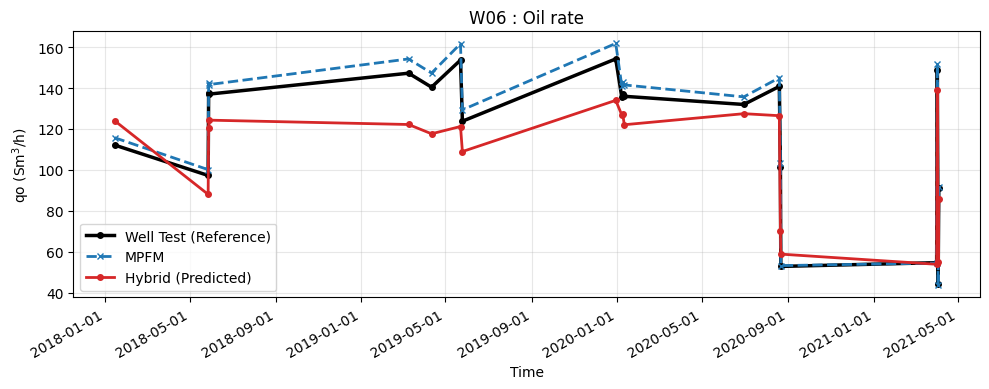

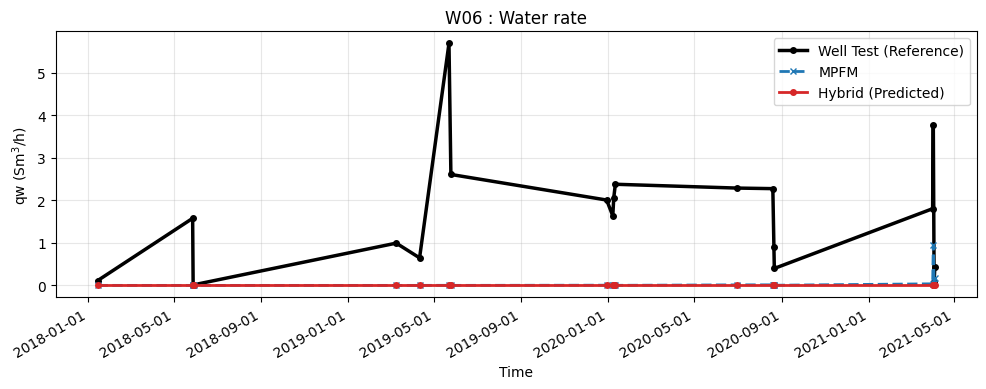

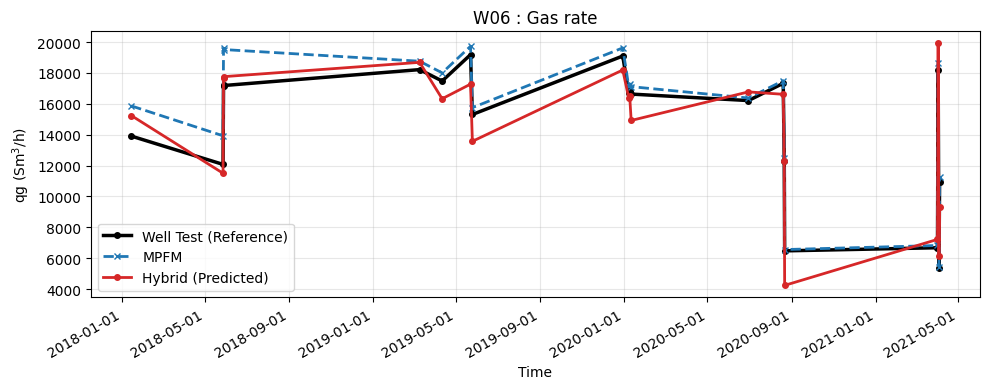

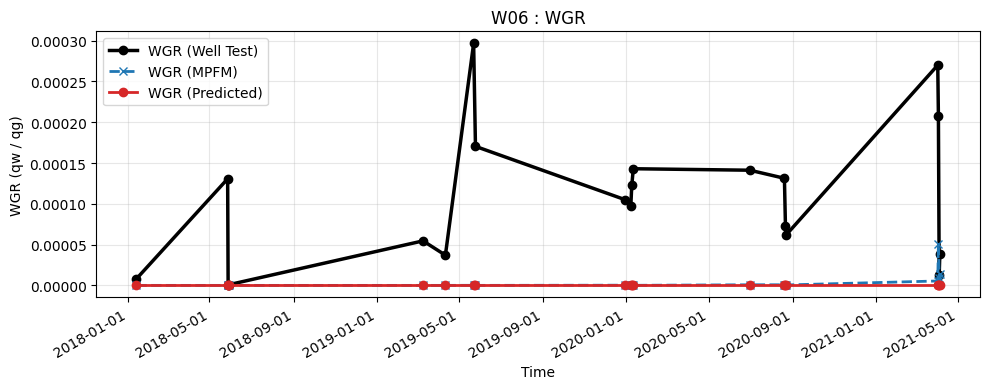

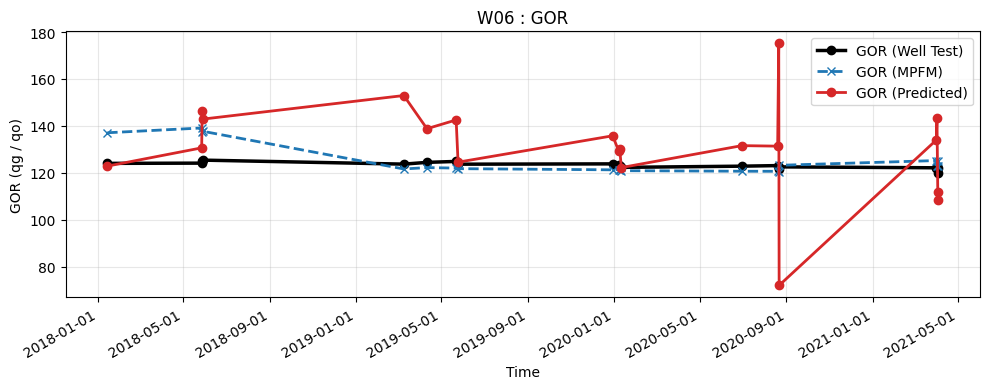

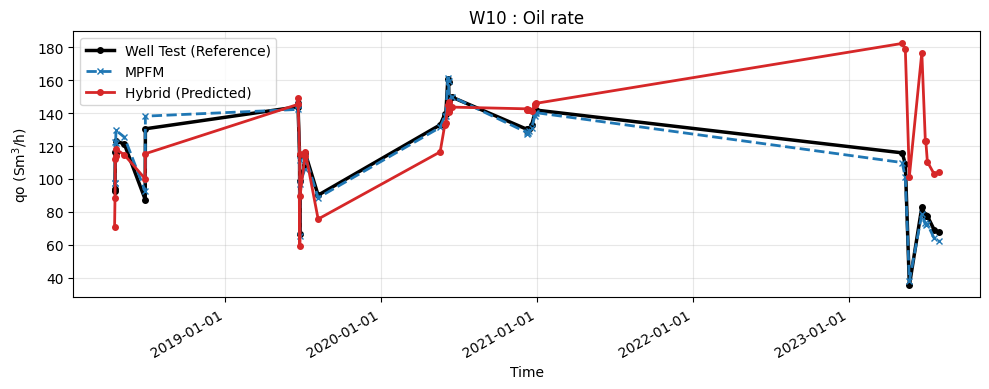

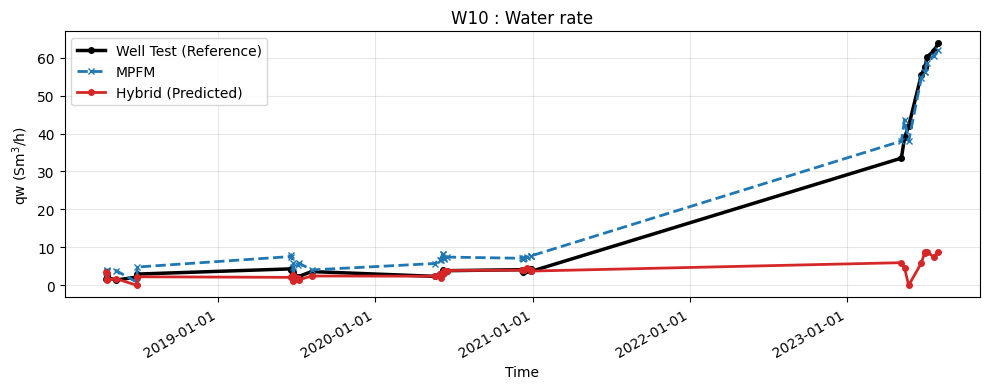

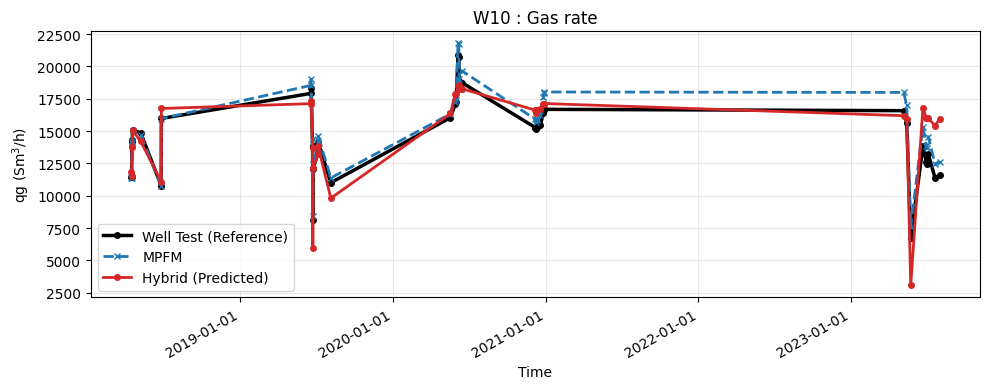

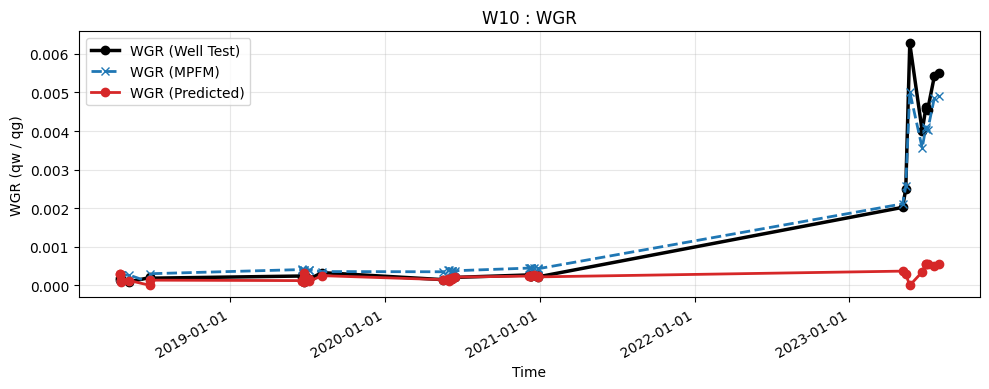

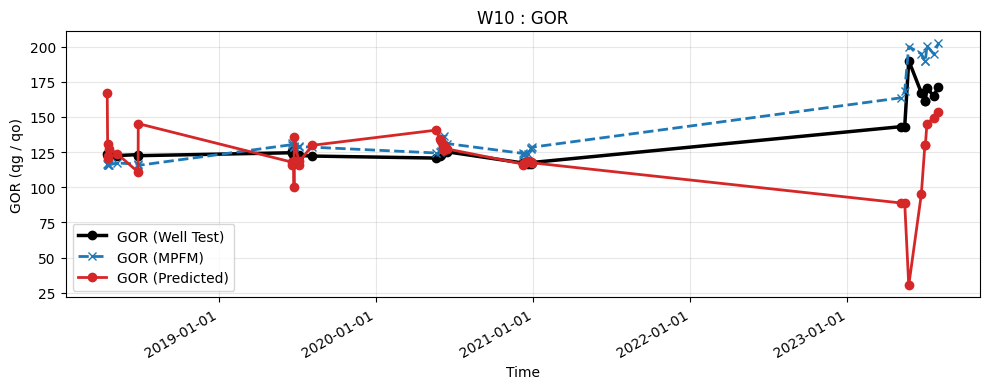

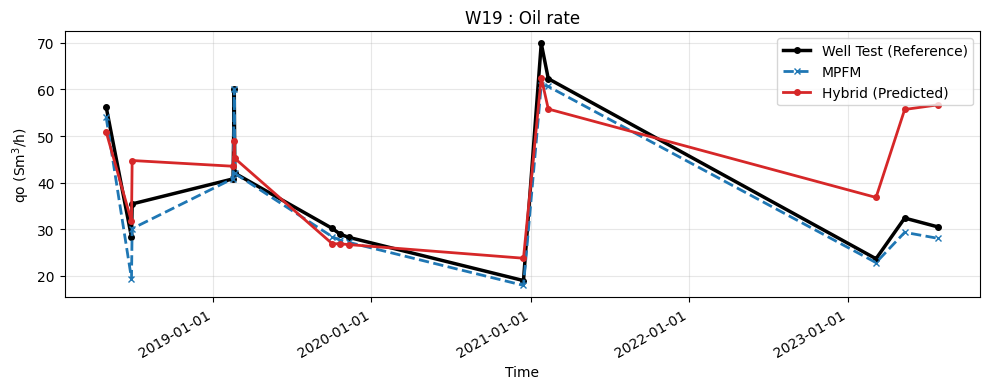

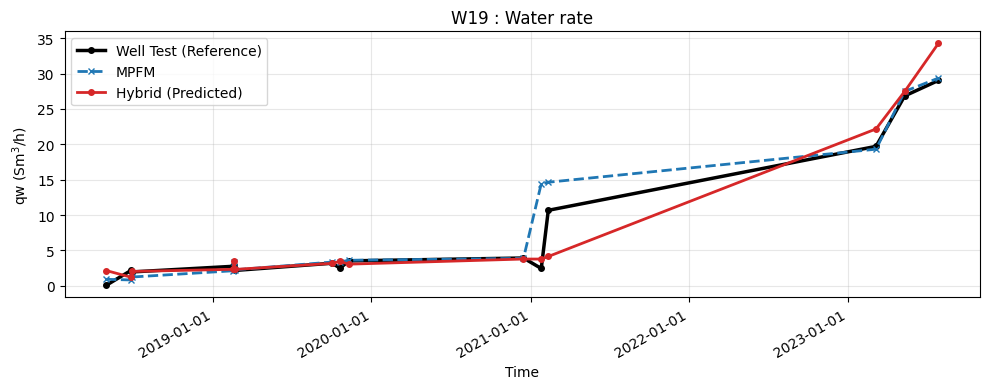

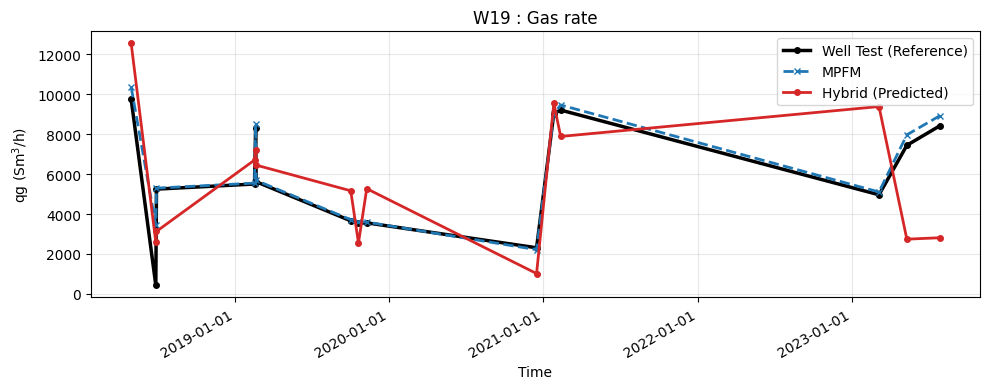

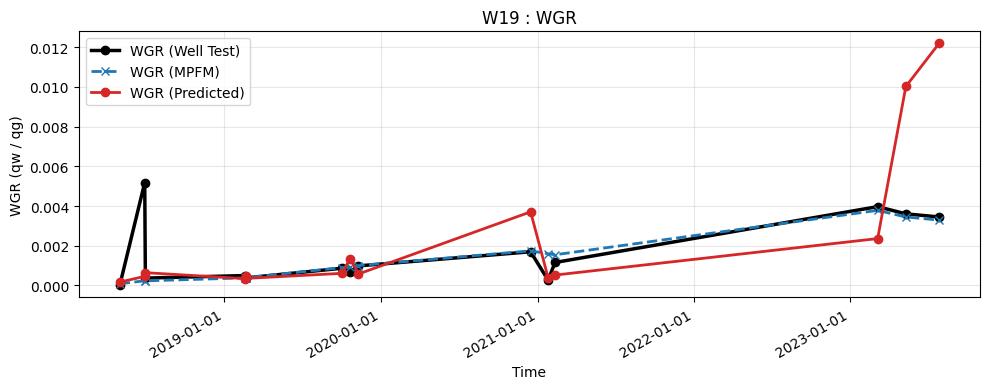

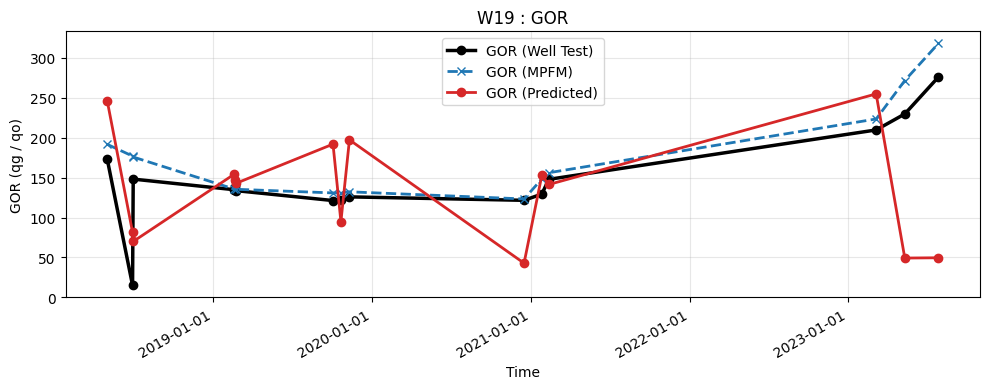

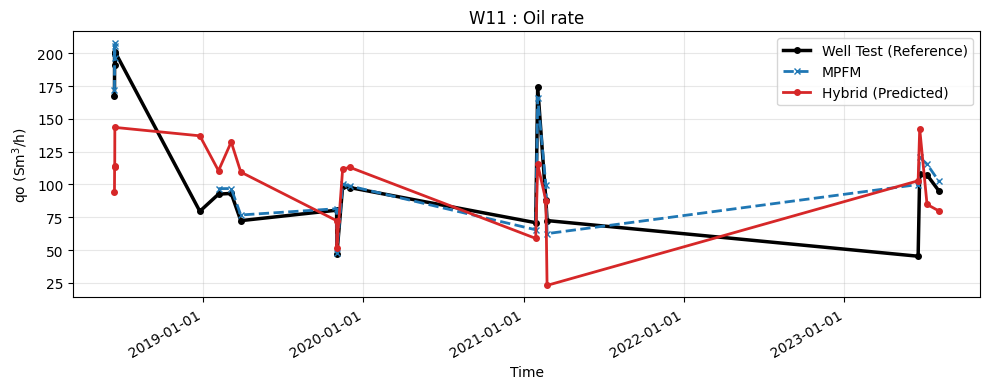

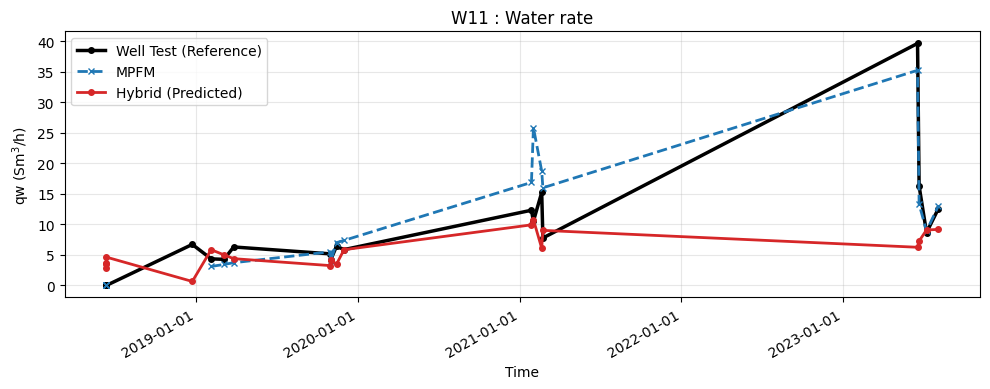

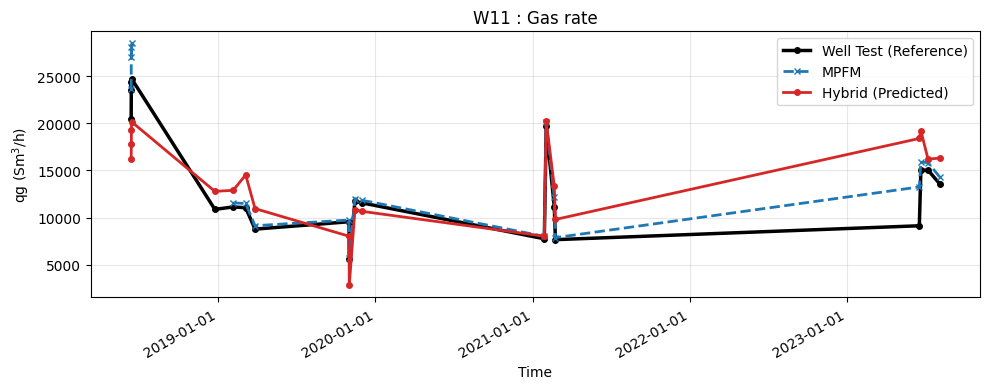

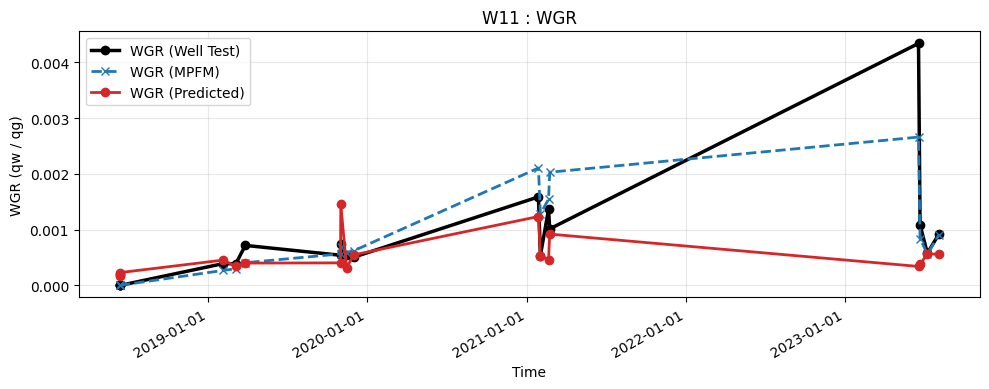

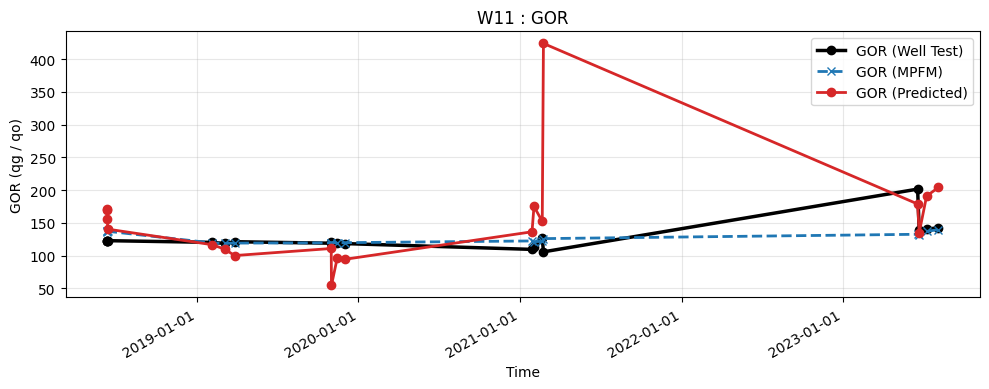

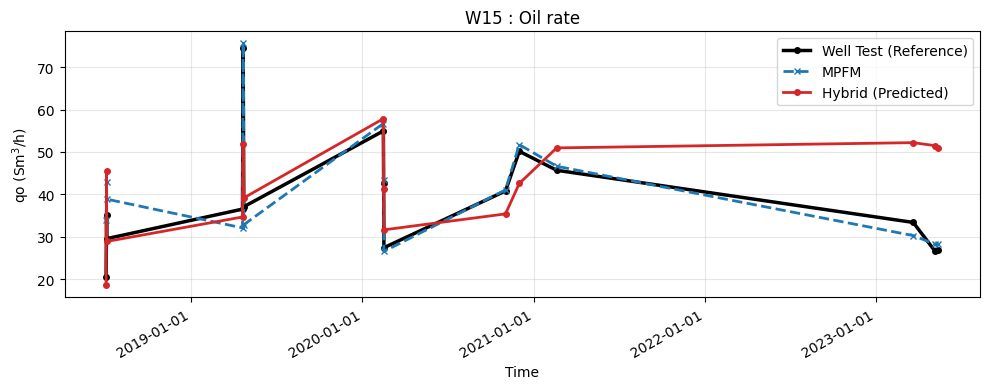

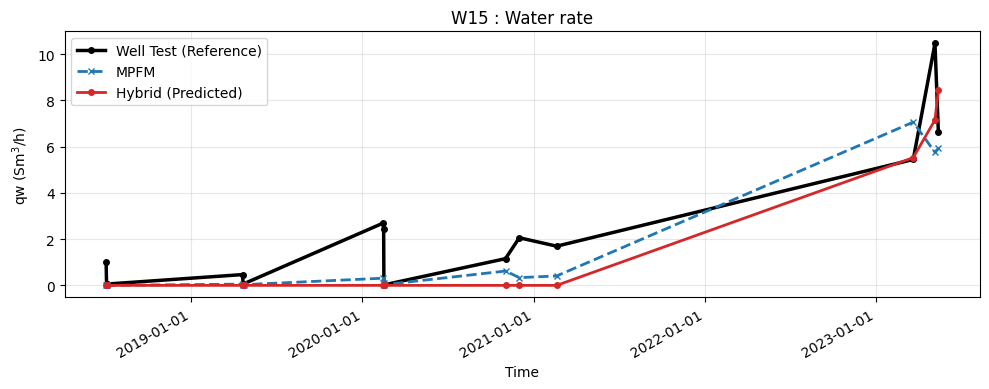

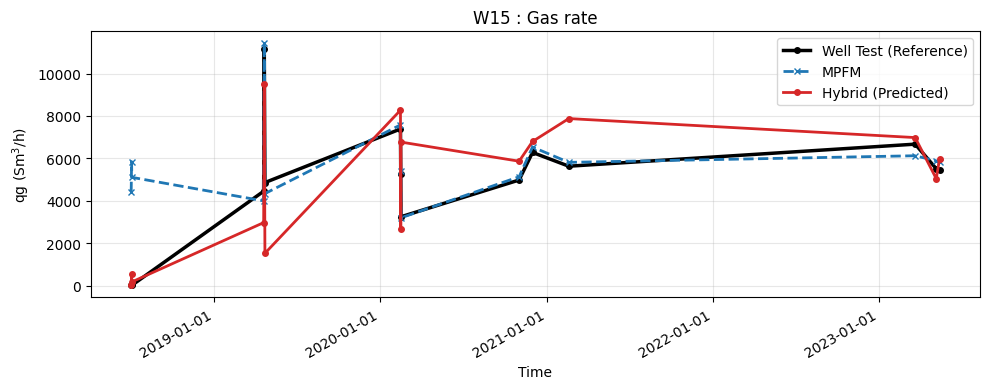

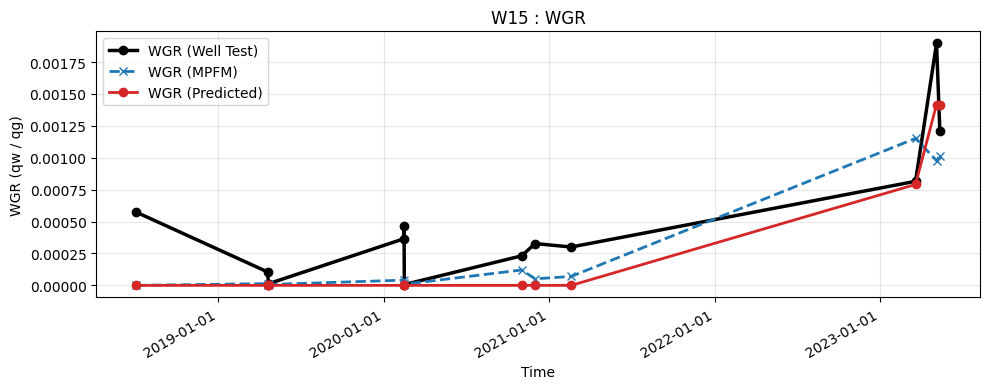

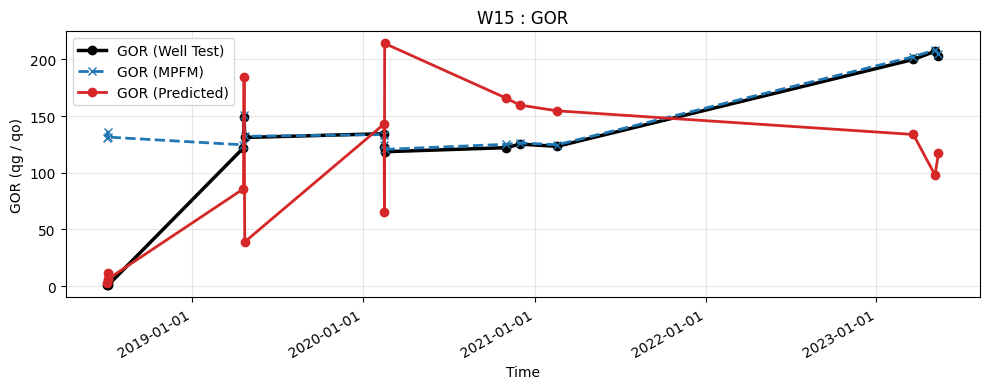

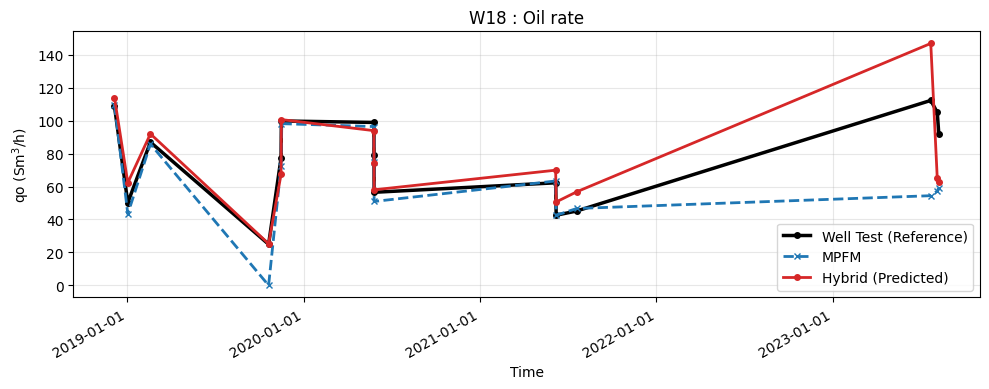

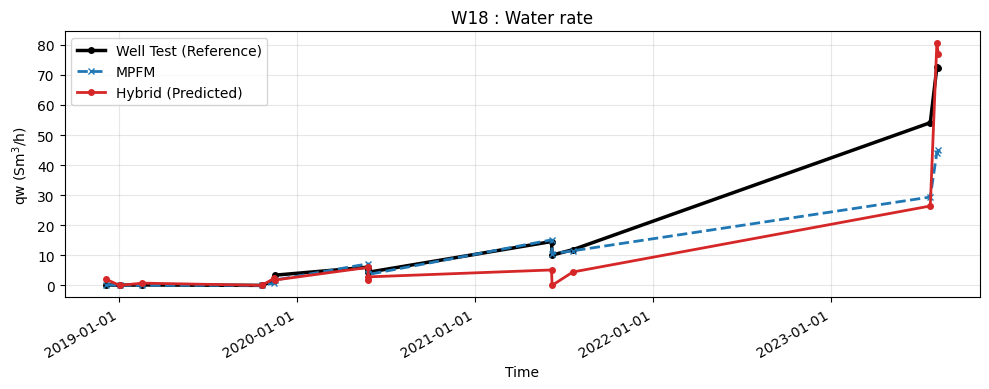

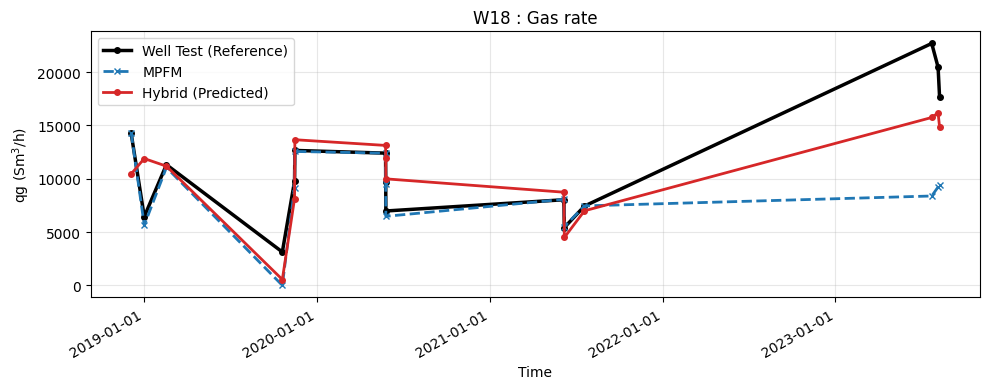

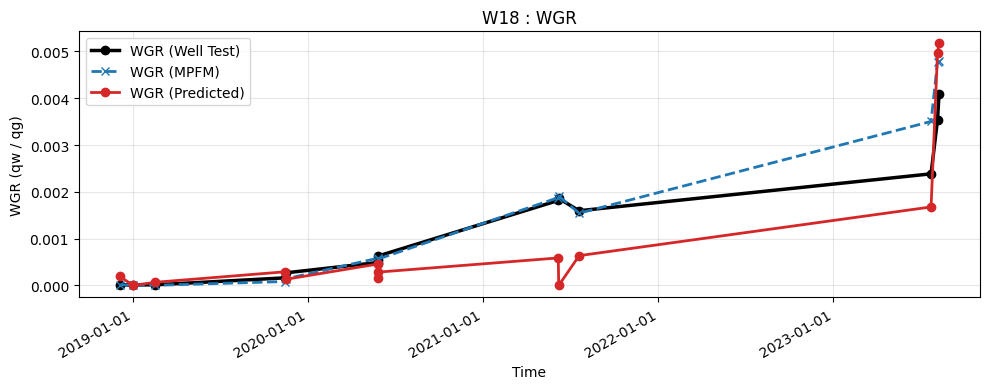

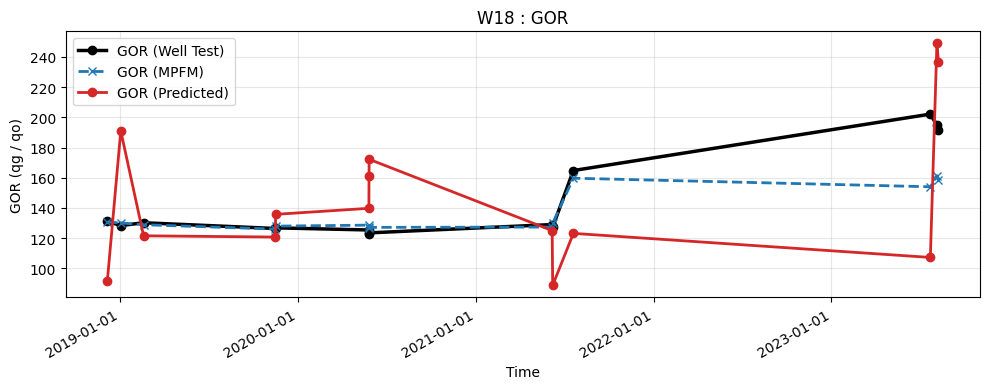

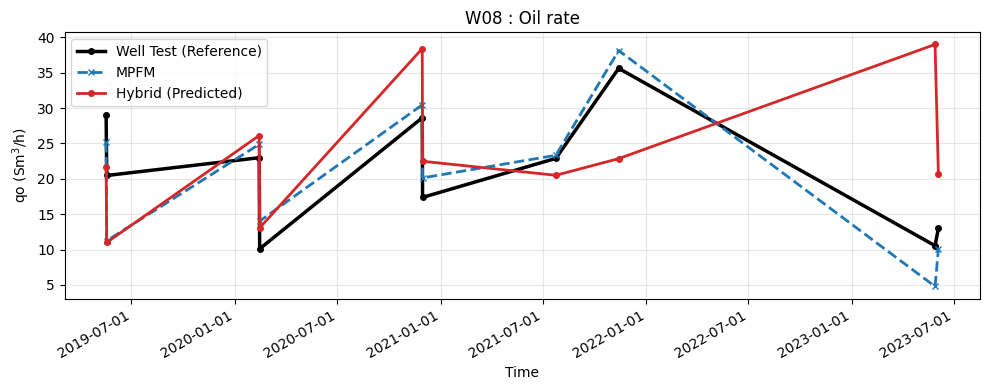

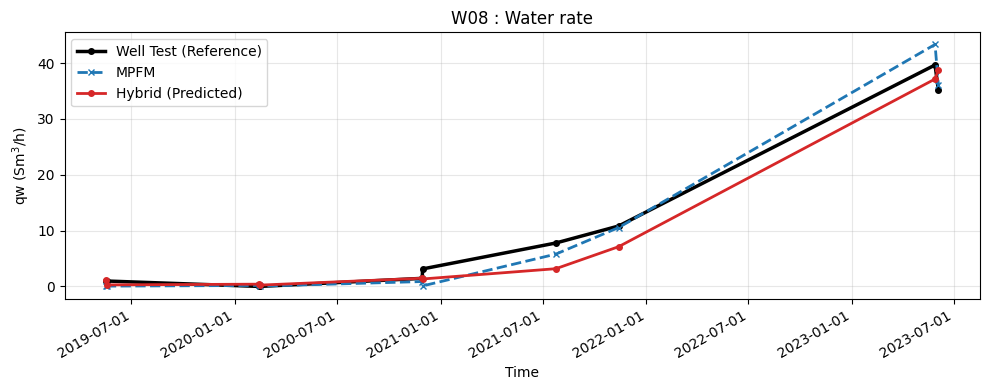

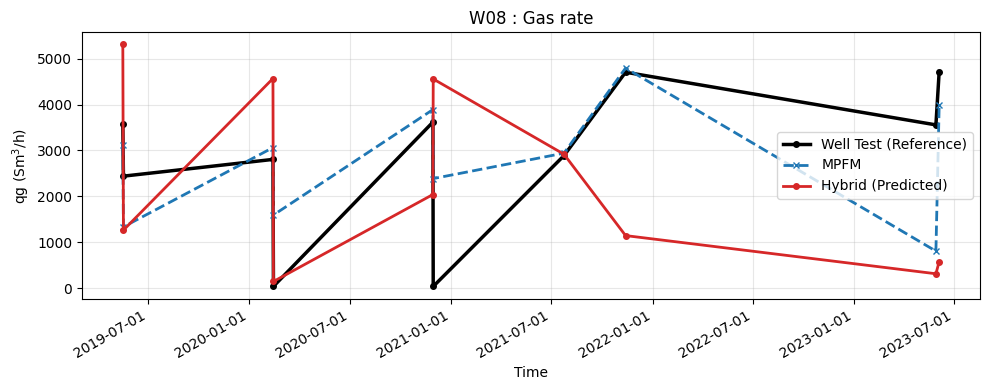

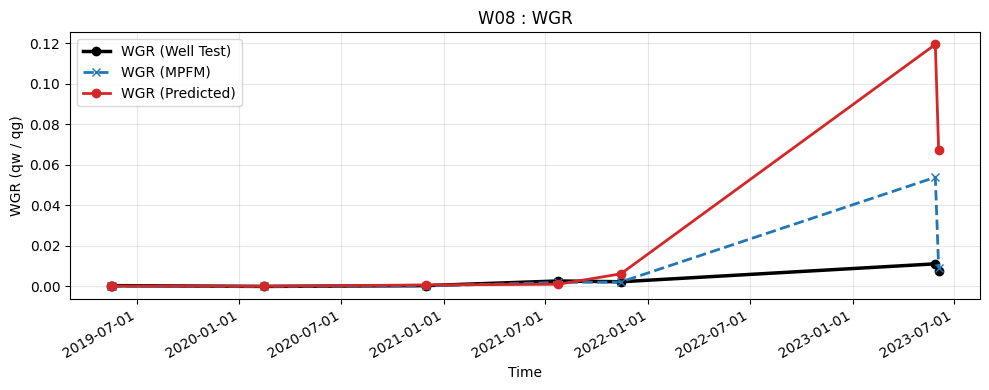

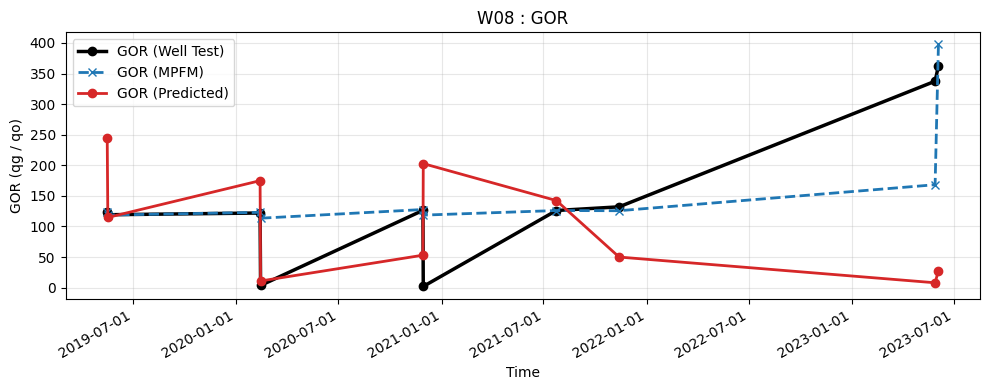

In [115]:
model.plot_predictions(df=df_test, is_hybrid_model=True)

### LOWO test

In [129]:
df_train_lowo, df_val_lowo, df_calibration_lowo, df_test_lowo = get_lowo_train_val_test_split(df=df_all_wells_preprocessed, test_well_id="W10")
print(f"{len(df_train_lowo)}, {len(df_val_lowo)}, {len(df_calibration_lowo)}, {len(df_test_lowo)}")

432, 102, 25, 196


In [130]:
model_lowo = PhysicsInformedHybridModel(dependant_vars=dependent_vars, independent_vars=independent_vars, well_geometry=None)
model_lowo.fit(df=df_train_lowo, df_val=df_val_lowo)

[Validation] Residual RMSE = 0.7516


In [131]:
model_lowo.calibrate_physics_only(df=df_calibration_lowo)

In [132]:
model_lowo.score_physics(df_test_lowo)

{'W10': {'qo': {'r2': 0.30024219963673016,
   'mae': 19.693457799925646,
   'rmse': 27.43462438405995,
   'mape (%)': 23.754376398212877,
   'mpe (%)': 16.20707639792939},
  'qw': {'r2': 0.0835918903558982,
   'mae': 3.149621276558621,
   'rmse': 10.4478214963746,
   'mape (%)': 44463.07618273106,
   'mpe (%)': 44427.84913432163},
  'qg': {'r2': 0.75257980033296,
   'mae': 1553.5097736637329,
   'rmse': 2085.277196651414,
   'mape (%)': 265.4824000290486,
   'mpe (%)': 253.96572946291212},
  'wgr': {'r2': 0.015815310727544385,
   'mae': 0.00027124764294569176,
   'rmse': 0.0009443534162413941,
   'mape (%)': 103.90944357766776,
   'mpe (%)': 68.74846005267452},
  'gor': {'r2': -1.5934471626736686,
   'mae': 14.912997823619303,
   'rmse': 25.947225029629564,
   'mape (%)': 143.36352132907444,
   'mpe (%)': 123.19122989413142}}}

In [133]:
model_lowo.score_hybrid(df_test_lowo)

{'W10': {'qo': {'r2': 0.7429096887168889,
   'mae': 13.169989414263469,
   'rmse': 16.629071451849363,
   'mape (%)': 13.201940870433926,
   'mpe (%)': 5.32226799447506},
  'qw': {'r2': 0.11342439546693384,
   'mae': 3.8847502661885884,
   'rmse': 10.276356699242196,
   'mape (%)': 17854.41478692367,
   'mpe (%)': 17732.540226248155},
  'qg': {'r2': 0.49497414374754656,
   'mae': 2521.5112260921446,
   'rmse': 2979.223084017012,
   'mape (%)': 63.21129876397631,
   'mpe (%)': 53.75803982417609},
  'wgr': {'r2': 0.0381585180245434,
   'mae': 0.00032848373651113606,
   'rmse': 0.0009335724027668432,
   'mape (%)': 87.14063658690743,
   'mpe (%)': -42.338925210522866},
  'gor': {'r2': -2.6916251549481807,
   'mae': 23.812412997247698,
   'rmse': 30.957153059610743,
   'mape (%)': 55.94942129022967,
   'mpe (%)': 43.15625961594959}}}

In [142]:
model_lowo.score_mpfm(df=df_test_lowo)

{'W10': {'qo': {'r2': 0.9588130717389175,
   'mae': 4.033600816842719,
   'rmse': 6.697322080021378,
   'mape (%)': 3.393361376806472,
   'mpe (%)': 0.9981725806978549},
  'qw': {'r2': 0.931778046297747,
   'mae': 2.456767555356198,
   'rmse': 2.8783910100477583,
   'mape (%)': 90319.2495649214,
   'mpe (%)': 90304.88668424128},
  'qg': {'r2': 0.9412707355360578,
   'mae': 520.8714687175346,
   'rmse': 1022.3903824214965,
   'mape (%)': 448.6297978892727,
   'mpe (%)': 447.8015820750989},
  'wgr': {'r2': 0.9496966174805719,
   'mae': 0.00017146188119526308,
   'rmse': 0.00021567400323933345,
   'mape (%)': 142.44468953082773,
   'mpe (%)': 128.80123287080397},
  'gor': {'r2': 0.13797918466097225,
   'mae': 7.95289409444641,
   'rmse': 15.113797457762514,
   'mape (%)': 456.1672216475437,
   'mpe (%)': 452.4619453374881}}}

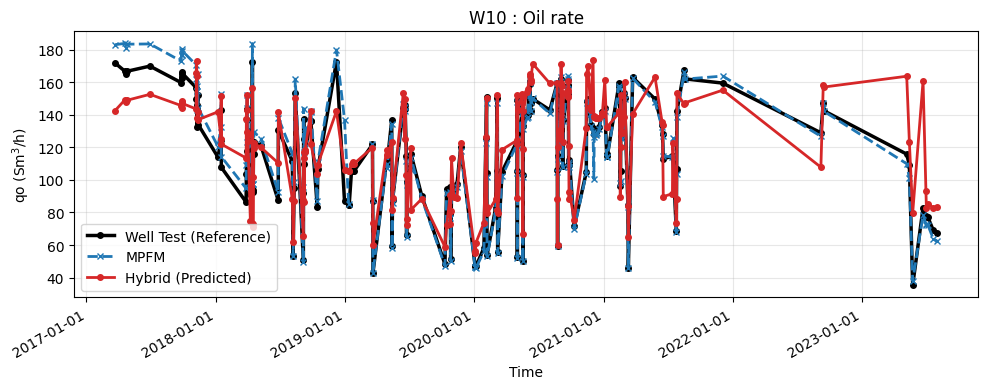

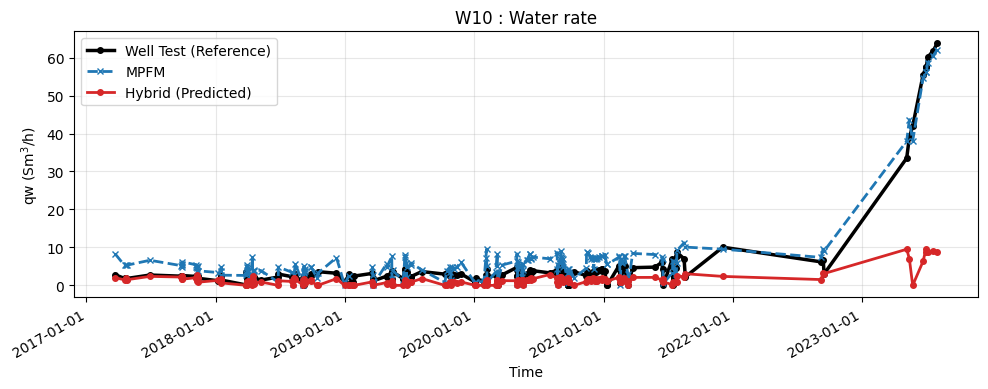

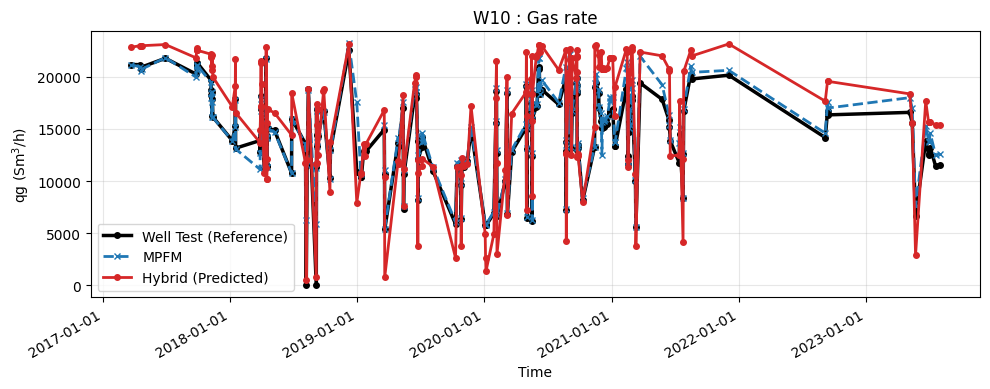

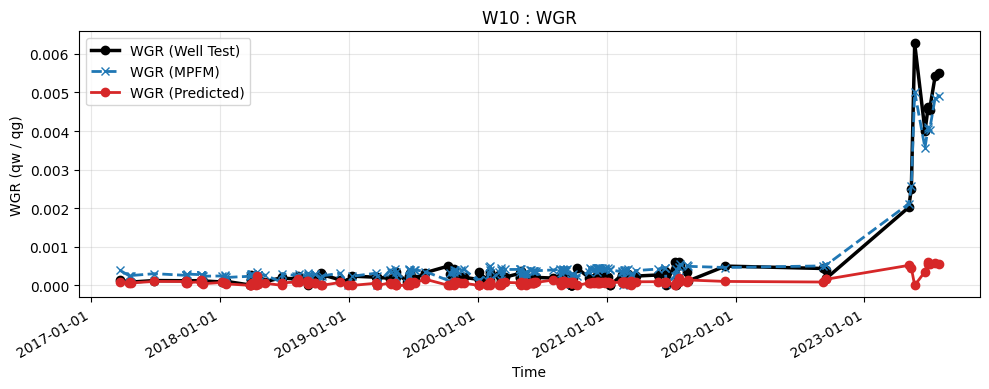

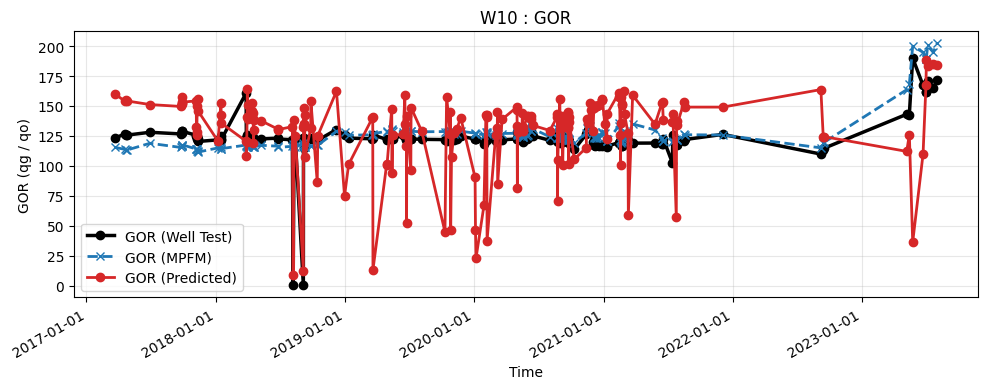

In [134]:
model_lowo.plot_predictions(df=df_test_lowo, model_tag_prefix="lowo")

### Resample and interpolate

In [135]:
resampler = Resampler()
df_resampled = resampler.resample_wells(df=df_all_wells_preprocessed, independent_vars=independent_vars)
print(summarize_null(df=df_resampled))
print(df_resampled.shape)

choke                  0
whp                    0
dcp                    0
dhp                    0
wht                    0
dht                    0
well_code              0
qo_well_test     2054830
qg_well_test     2054830
qw_well_test     2054830
qo_mpfm          2054860
qg_mpfm          2054860
qw_mpfm          2054860
wc_mpfm          2054830
gor_mpfm         2054865
wgr_mpfm         2054866
gor_well_test    2054830
wgr_well_test    2054830
time_idx               0
is_observed            0
well_id                0
dtype: int64
(2055585, 21)


In [136]:
df_resampled.index

RangeIndex(start=0, stop=2055585, step=1)

In [137]:
df_resampled.columns

Index(['choke', 'whp', 'dcp', 'dhp', 'wht', 'dht', 'well_code', 'qo_well_test',
       'qg_well_test', 'qw_well_test', 'qo_mpfm', 'qg_mpfm', 'qw_mpfm',
       'wc_mpfm', 'gor_mpfm', 'wgr_mpfm', 'gor_well_test', 'wgr_well_test',
       'time_idx', 'is_observed', 'well_id'],
      dtype='object')

In [138]:
df_resampled[df_resampled["is_observed"] == 1].shape

(755, 21)

In [139]:
# Monotonic
df_resampled.groupby("well_id")["time_idx"].is_monotonic_increasing

well_id
W06    True
W08    True
W10    True
W11    True
W15    True
W18    True
W19    True
Name: time_idx, dtype: bool

In [140]:
# df_generated = model.generate_dense_well_rates(df=df_resampled)
# df_generated

In [141]:
# summarize_null(df_generated)